In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head().style.background_gradient()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.select_dtypes('object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
6,"McCarthy, Mr. Timothy J",male,17463,E46,S
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,NaN,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,NaN,C


In [8]:
numeric_df = train_df._get_numeric_data()
numeric_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,NaN,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [9]:
numeric_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891,446,257.354,1,223.5,446,668.5,891
Survived,891,0.383838,0.486592,0,0,0,1,1
Pclass,891,2.30864,0.836071,1,2,3,3,3
Age,714,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,0.523008,1.10274,0,0,0,1,8
Parch,891,0.381594,0.806057,0,0,0,0,6
Fare,891,32.2042,49.6934,0,7.9104,14.4542,31,512.329


In [10]:
pd.DataFrame(numeric_df.corr())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


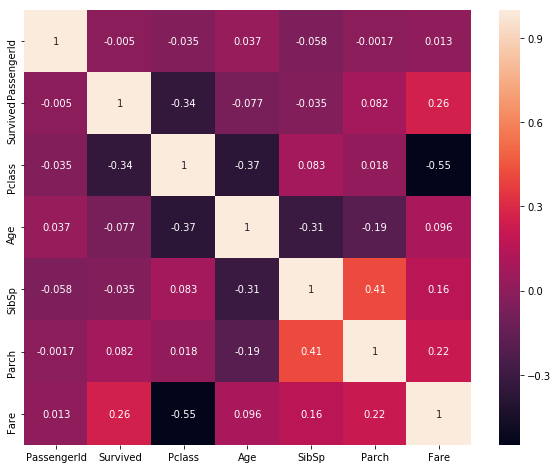

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(),annot = True)

The most correlation features is Fare with Pclass at (**0.55**).

# **Survived**

AttributeError: Unknown property xlabel

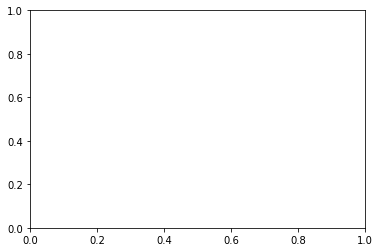

In [13]:
colors = ['#83483B', '#CC5940']

ax = (numeric_df['Survived'].value_counts()*100.0 /len(numeric_df)).plot(kind='bar', xlabel='Survive',color = colors,
                                                       ylabel='% Survives', title='Survival Percentage', legend = True, rot = 0)

totals = []

for i in ax.patches:
    totals.append(i.get_width())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()-3.5, \
str(round((i.get_height()/total), 1))+'%',fontsize=12,color='White',weight = 'bold')

As we can see from the chart the percentage of survived passengers is **38.4%** and not survived passengers is **61.6%**.

# Passesnger Class

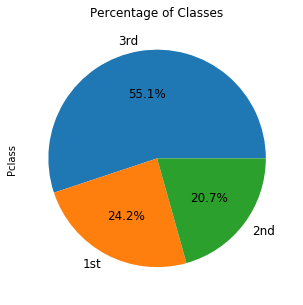

In [14]:
df2 = numeric_df

plt.subplots(figsize=(5,5))

ax = (df2['Pclass'].value_counts()*100.0 /len(df2))\
.plot.pie(autopct='%.1f%%', labels = ['3rd', '1st', '2nd'], title = 'Percentage of Classes', fontsize = 12) 

Most passengers travel in 3rd class with a percentage **55.1%**.

AttributeError: Unknown property ylabel

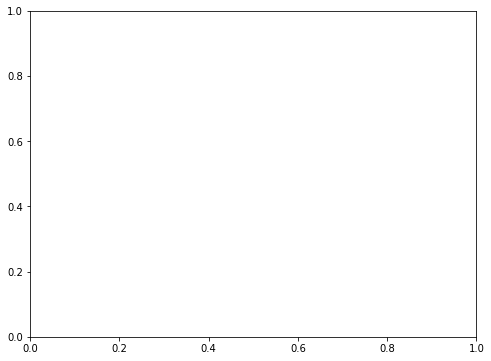

In [15]:
colors = ['#83483B', '#CC5940']

df_plot = df2.groupby(['Pclass', 'Survived']).size().reset_index().pivot(columns='Survived', index='Pclass', values=0)
ax = df_plot.plot(kind = 'bar', rot = 0, color = colors, ylabel = 'Count',figsize=(8, 6))

total = len(df2)

for i in ax.patches:
    percentage = ' ' + '{:.2f}%'.format((i.get_height()/total)*100)
    x = i.get_x()-0.02
    y = i.get_height()+1
    ax.annotate(percentage, (x,y),fontsize=11,color='Black',weight = 'bold')

The 3rd class is the most class not able to survive with percentage of **(41.75%)**.

C:\Users\HOLLYWOOD\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


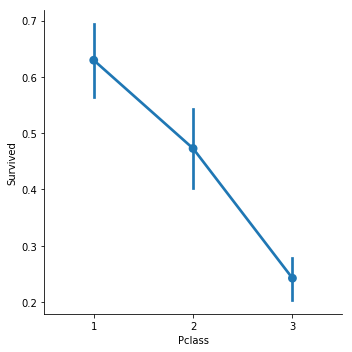

In [16]:
sns.catplot(x = 'Pclass',y = 'Survived',data=numeric_df, kind = 'point')

* The 1st class has the higher survival rate compare to other two.
* The 3rd class has the lower survival rate.

# Parents / children

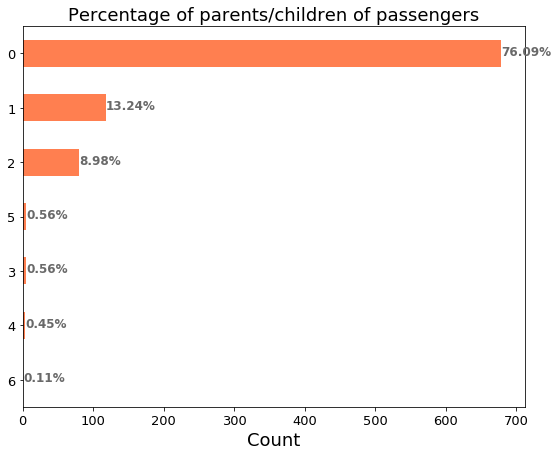

In [17]:
ax = numeric_df['Parch'].value_counts().plot(kind='barh', figsize=(9,7),
                                        color="coral", fontsize=13)

ax.set_title("Percentage of parents/children of passengers", fontsize=18)
ax.set_xlabel("Count", fontsize=18);

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.28, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12,color='dimgrey',weight = 'bold')
ax.invert_yaxis()


The majority of passengers **(76.09%)** were traviling alone.

AttributeError: Unknown property ylabel

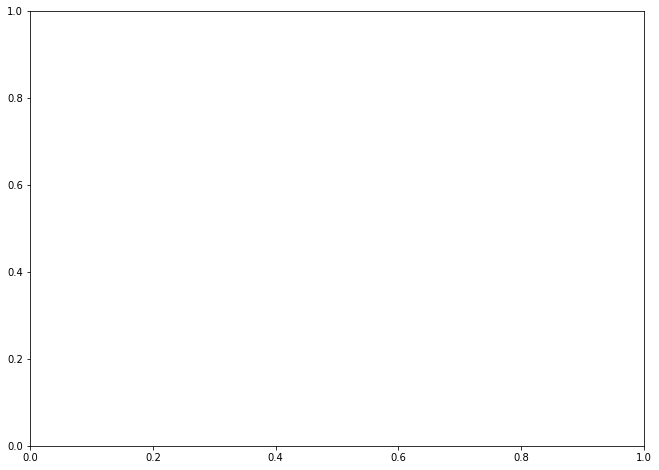

In [18]:
colors = ['#83483B', '#CC5940']

df_plot = df2.groupby(['Parch', 'Survived']).size().reset_index().pivot(columns='Survived', index='Parch', values=0)
ax = df_plot.plot(kind = 'bar', rot = 0, color = colors, ylabel = 'Count',figsize=(11, 8), width = 0.8)

total = len(df2)

for i in ax.patches:
    percentage = ' ' + '{:.2f}%'.format((i.get_height()/total)*100)
    x = i.get_x()-0.02
    y = i.get_height()+0.7
    ax.annotate(percentage, (x,y),fontsize=10,color='Black', weight='bold')

**49.94%** of the total passengers who were traveled alone not able to survive. 

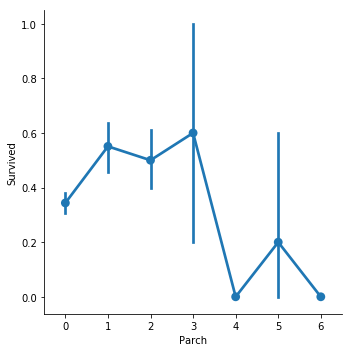

In [19]:
sns.catplot(x = 'Parch',y = 'Survived',data=numeric_df, kind = 'point')

* The highest survival rate for passengers are those who have 3 total family members.
* The least are 4,6 and 5 respectively.
* Passengers who traveled alone have a low survival rate compared to all except 4,5 and 6.

# Embarked

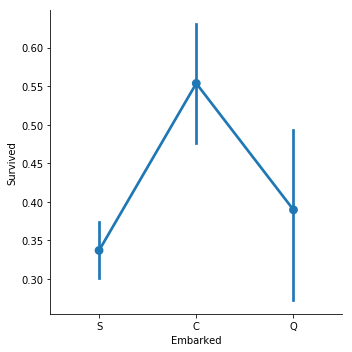

In [20]:
sns.catplot(x = 'Embarked',y = 'Survived',data=train_df, kind = 'point')

* The passengers who embarked from Cherbourg Port had the highest survival rate.
* The passengers who embarked from Southampton Port had the least survival rate.

# Sex

AttributeError: Unknown property xlabel

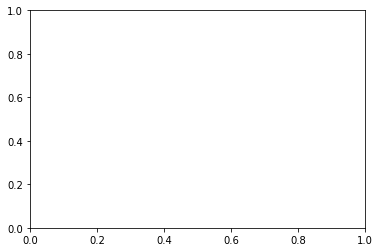

In [21]:
colors = ['#83483B', '#CC5940']

ax = (train_df['Sex'].value_counts()*100.0 /len(train_df)).plot(kind='bar', xlabel='Count',color = colors,
                                                       ylabel='Sex', title='Survival Percentage', legend = True, rot = 0)

totals = []

for i in ax.patches:
    totals.append(i.get_width())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()-3.5, \
str(round((i.get_height()/total), 1))+'%',fontsize=12,color='White',weight = 'bold')

* Most of passengers were males **(64.8%)**.
* The least were females **(35.2%)**.

AttributeError: Unknown property ylabel

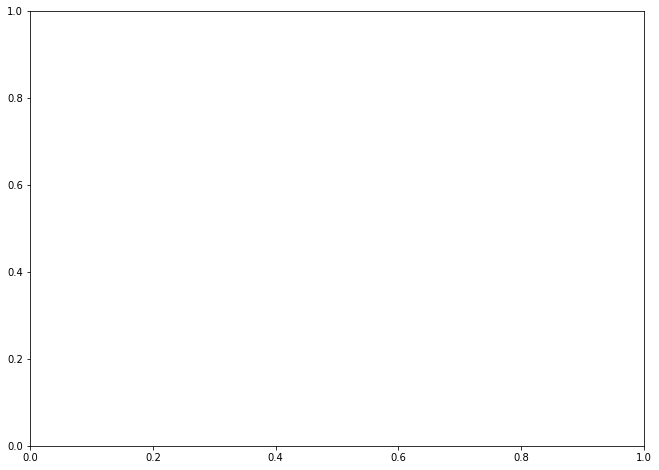

In [22]:
colors = ['#83483B', '#CC5940']

df_plot = train_df.groupby(['Sex', 'Survived']).size().reset_index().pivot(columns='Survived', index='Sex', values=0)
ax = df_plot.plot(kind = 'bar', rot = 0, color = colors, ylabel = 'Count',figsize=(11, 8))

total = len(df2)

for i in ax.patches:
    percentage = ' ' + '{:.2f}%'.format((i.get_height()/total)*100)
    x = i.get_x()+0.04
    y = i.get_height()+2
    ax.annotate(percentage, (x,y),fontsize=12,color='Black', weight='bold')

The total of passengers who were not able to survive was males with the percentage of **(52.53%)**.

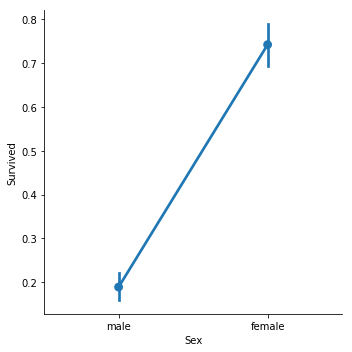

In [23]:
sns.catplot(x = 'Sex',y = 'Survived',data=train_df, kind = 'point')

The highest survival rate was for females and it's almost 4 times the rate of males.

# Pclass-Sex-Survived

In [ ]:
sns.catplot(x = 'Pclass',y = 'Survived',data=train_df, kind = 'point', hue = "Sex")

* Females passengers had more survival rates than the males in all passenger classes.
* Females that were in the 1st class have the highest survival rate.
* Males that were in the 3rd class have the lowest survival rate.

# Parch-Sex-Survived

In [ ]:
sns.catplot(x = 'Parch',y = 'Survived',data=train_df, kind = 'point', hue = "Sex")

Females that were traveling alone have the highest survival rate compared to other all passengers with different family members.